In [5]:
cd /home

/home


In [62]:
import tensorflow as tf
import pandas as pd 

import matplotlib.pyplot as plt

import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

%load_ext autoreload
%autoreload 2

from src.data.loaders import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RECORDS

In [86]:
data = load_data('./data/records/macho_clean/test/',
                    batch_size=10,
                    window_size=50,
                    sampling=True,
                    nsp_prob=.5,
                    test_mode=True)

[INFO] Sampling random windows


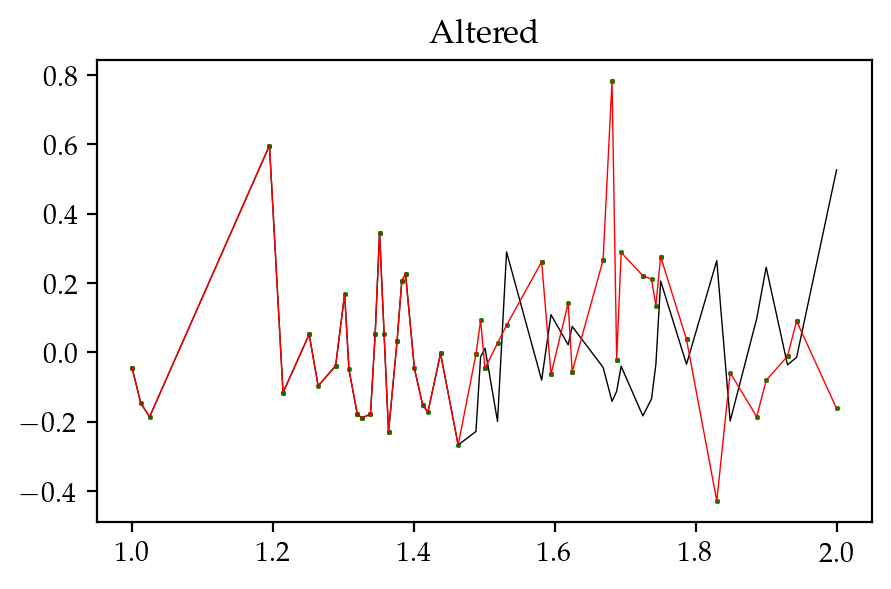

In [90]:
import numpy as np
plt.figure(figsize=(5, 3), dpi=200)
for x, y in data.take(1):
    
    N =1
    
    original   = x['original'][N]
    mask       = x['mask'][N]
    magnitudes = x['magnitudes'][N, 1:, 0]
    att_mask   = x['att_mask'][N, 1:, 0]
    times      = x['times'][N, 1:, 0]
    
    visible = tf.boolean_mask(magnitudes, 1.-att_mask)    
    times_visible = tf.boolean_mask(times, 1.-att_mask) 
    
    target = y['magnitudes'][N, :, 0]
    target = tf.boolean_mask(target, y['probed_mask'][N, :, 0])
    
    times_target = tf.boolean_mask(times, y['probed_mask'][N, :, 0]) 
    
    plt.scatter(times_visible, visible, marker='s', s=1, color='r')
    plt.scatter(times_target, target, marker='s', s=1, color='g')
    
    original = tf.boolean_mask(original, mask)
    times = tf.boolean_mask(times, mask)
    
    inputs = tf.boolean_mask(magnitudes, mask)

    plt.plot(times, original[:, 1], linestyle='-', linewidth=.5, color='k')
    plt.plot(times, inputs, linestyle='-', linewidth=.5, color='r')
    
    if y['nsp_label'][N] == 1:
        plt.title('Non-Altered')
    else:
        plt.title('Altered')